<a href="https://colab.research.google.com/github/Sananda-Dutta/CODSOFT/blob/main/advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loading failed: Missing columns: ['TV', 'Radio', 'Newspaper', 'Sales']
Sample data will be generated instead...

=== Data Summary ===
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.961452   35.858682   19.571725   56.564655
std     46.550196    9.870038    4.970210   14.323141
min     19.012745    2.587327    7.641777   15.037050
25%    114.743616   28.941625   16.030608   46.104386
50%    149.790406   35.788393   19.612000   57.879889
75%    175.042624   41.872311   22.860441   65.285277
max    286.008458   73.527315   35.394404   96.496277

=== Missing Values ===
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


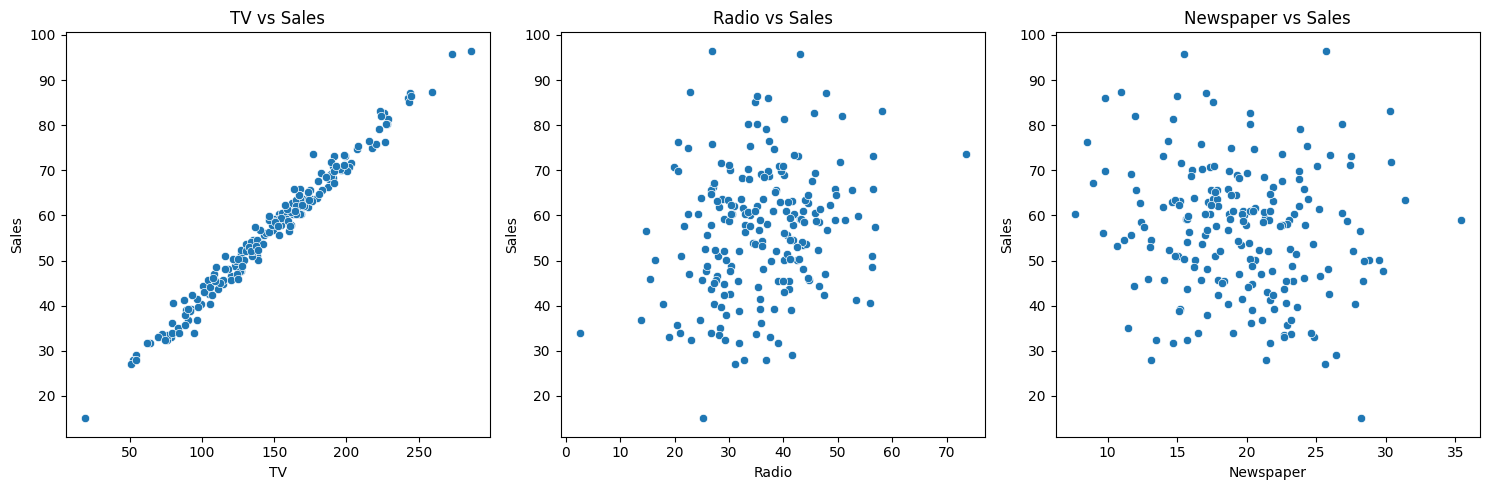

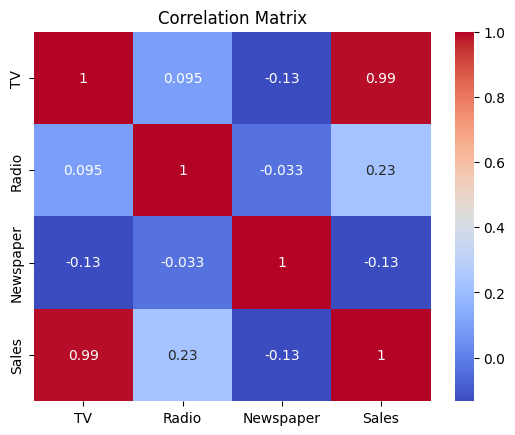


=== Model Performance ===
                         R2       MSE  \
Linear Regression  0.998799  0.215108   
Ridge Regression   0.998751  0.223707   
Random Forest      0.976861  4.143002   

                                                               Model  
Linear Regression                                 LinearRegression()  
Ridge Regression                                             Ridge()  
Random Forest      (DecisionTreeRegressor(max_features=1.0, rando...  

Predicted Sales for $200k TV, $40k Radio, $30k Newspaper: $73.12k


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

def load_data():
    """Load and validate the advertising dataset"""
    try:
        try:
            url = "https://raw.githubusercontent.com/Sananda-Dutta/CODSOFT/main/Task-4-Sales-Prediction/advertising.csv"
            df = pd.read_csv(url)
        except:
            df = pd.read_csv("advertising.csv")

        df.columns = df.columns.str.strip().str.title()
        df = df.rename(columns={
            'Tv': 'TV',
            'Newspaperad': 'Newspaper',
            'Salesamount': 'Sales'
        })

        required_cols = ['TV', 'Radio', 'Newspaper', 'Sales']
        missing = [col for col in required_cols if col not in df.columns]
        if missing:
            raise ValueError(f"Missing columns: {missing}")

        return df

    except Exception as e:
        print(f"Data loading failed: {str(e)}")
        print("Sample data will be generated instead...")
        return generate_sample_data()

def generate_sample_data():
    """Generate synthetic data if real data isn't available"""
    np.random.seed(42)
    tv = np.random.normal(150, 50, 200)
    radio = np.random.normal(35, 10, 200)
    newspaper = np.random.normal(20, 5, 200)
    sales = 5 + 0.5*np.random.normal(0, 1, 200) + 0.3*tv + 0.2*radio

    data = {
        'TV': tv,
        'Radio': radio,
        'Newspaper': newspaper,
        'Sales': sales
    }
    return pd.DataFrame(data)

def eda(df):
    """Perform exploratory data analysis"""
    print("\n=== Data Summary ===")
    print(df.describe())

    print("\n=== Missing Values ===")
    print(df.isna().sum())

    plt.figure(figsize=(15, 5))
    for i, col in enumerate(['TV', 'Radio', 'Newspaper'], 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(x=col, y='Sales', data=df)
        plt.title(f"{col} vs Sales")
    plt.tight_layout()
    plt.show()

    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

def train_models(X_train, X_test, y_train, y_test):
    """Train and compare multiple models"""
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=100)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'R2': r2_score(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'Model': model
        }

    return pd.DataFrame(results).T.sort_values('R2', ascending=False)

def main():
    df = load_data()
    eda(df)

    X = df[['TV', 'Radio', 'Newspaper']]
    y = df['Sales']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = train_models(X_train_scaled, X_test_scaled, y_train, y_test)
    print("\n=== Model Performance ===")
    print(results)

    best_model = results.iloc[0]['Model']
    sample_input = scaler.transform([[200, 40, 30]])
    prediction = best_model.predict(sample_input)
    print(f"\nPredicted Sales for $200k TV, $40k Radio, $30k Newspaper: ${prediction[0]:.2f}k")

if __name__ == "__main__":
    main()